In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [84]:
data = pd.read_csv("HepatitisCdata.csv")
data = data.drop(["Unnamed: 0"],axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [85]:
# delete suspect Blood Donor
data = data[data['Category'] != '0s=suspect Blood Donor']

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    object 
 1   Age       608 non-null    int64  
 2   Sex       608 non-null    object 
 3   ALB       607 non-null    float64
 4   ALP       590 non-null    float64
 5   ALT       607 non-null    float64
 6   AST       608 non-null    float64
 7   BIL       608 non-null    float64
 8   CHE       608 non-null    float64
 9   CHOL      598 non-null    float64
 10  CREA      608 non-null    float64
 11  GGT       608 non-null    float64
 12  PROT      607 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 66.5+ KB


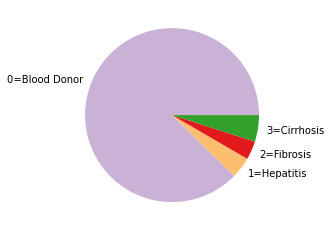

In [57]:
colors = sns.color_palette('Paired_r')[1:]
plt.pie(data.groupby('Category').Category.count().values, labels = data.groupby('Category').Category.count().index, colors = colors)
plt.show()

In [31]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [78]:
data.groupby('Category').Category.count()

Category
0=Blood Donor    533
1=Hepatitis       24
2=Fibrosis        21
3=Cirrhosis       30
Name: Category, dtype: int64

In [63]:
data.isnull().groupby(data['Category']).sum()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,,
0=Blood Donor,0,0,0,0,0,0,0,0,0,7,0,0,0
1=Hepatitis,0,0,0,0,3,1,0,0,0,0,0,0,0
2=Fibrosis,0,0,0,0,9,0,0,0,0,1,0,0,0
3=Cirrhosis,0,0,0,1,6,0,0,0,0,2,0,0,1


In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
print(le.classes_)

le = LabelEncoder()
data["Category"]=le.fit_transform(data["Category"])
print(le.classes_)

['f' 'm']
['0=Blood Donor' '1=Hepatitis' '2=Fibrosis' '3=Cirrhosis']


C:\Users\Shen\AppData\Local\Temp/ipykernel_20700/1653929860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"]=le.fit_transform(data["Sex"])
C:\Users\Shen\AppData\Local\Temp/ipykernel_20700/1653929860.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"]=le.fit_transform(data["Category"])


In [88]:
data.shape

(608, 13)

In [98]:
# delete the whole row which contains N/A in HEALTHY blood donor
data_0 = data[data['Category']==0].dropna()

In [99]:
for i in range(1,4):
    data_cat = data[data['Category']==i]
    data_cat = data_cat.fillna(data_cat.mean())
    data_0 = pd.concat([data_0, data_cat], ignore_index=True)

data_0

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,3,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
597,3,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
598,3,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
599,3,46,0,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [109]:
data_0.to_csv("preprocesseddata.csv",sep=',')

In [100]:
y = data[['Category']]
X = data.drop(['Category'],axis=1)

In [101]:
# data basic statistics
X.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,608.000000,608.000000,607.000000,590.000000,607.000000,608.000000,608.000000,608.000000,598.000000,608.000000,608.000000,607.000000
mean,47.291118,0.610197,41.818781,67.821017,27.601318,34.369408,11.474013,8.204885,5.378829,81.513158,38.243914,72.253213
std,9.992705,0.488107,5.406717,25.274423,21.227539,32.622442,19.770558,2.168400,1.119394,49.720652,51.953220,4.932252
min,19.000000,0.000000,20.000000,11.300000,0.900000,12.000000,1.800000,1.420000,1.430000,8.000000,4.500000,51.000000
25%,39.000000,0.000000,39.000000,52.500000,16.400000,21.600000,5.300000,6.950000,4.620000,68.000000,15.700000,69.450000
50%,47.000000,1.000000,42.000000,66.000000,23.000000,25.850000,7.300000,8.270000,5.300000,77.000000,23.250000,72.200000
75%,54.000000,1.000000,45.250000,79.525000,32.750000,32.800000,11.300000,9.585000,6.075000,88.000000,39.200000,75.400000
max,77.000000,1.000000,82.200000,416.600000,258.000000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


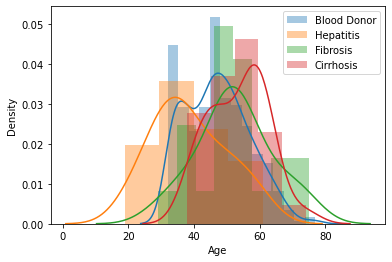

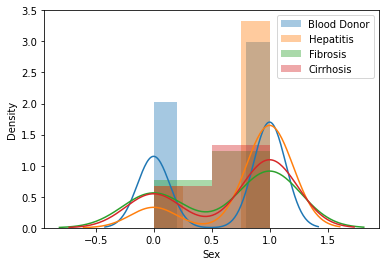

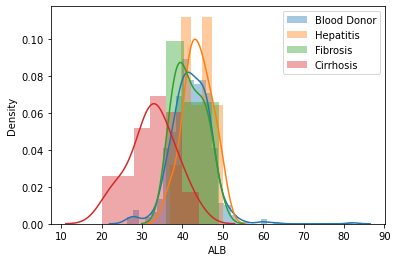

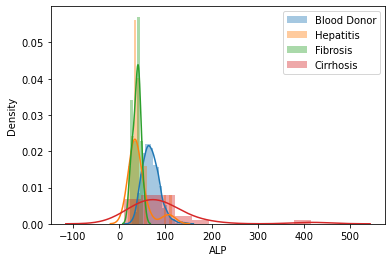

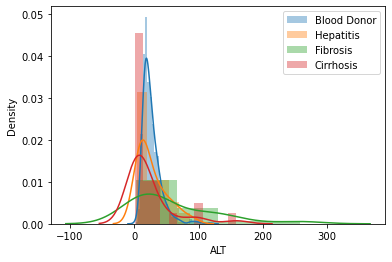

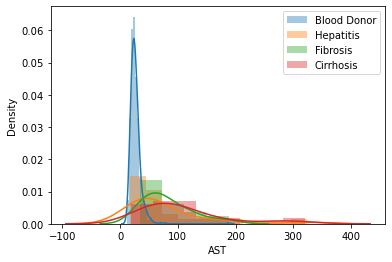

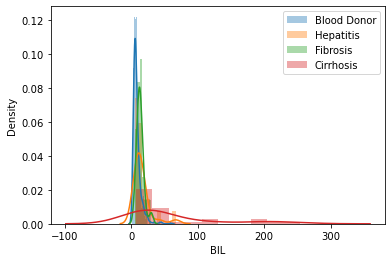

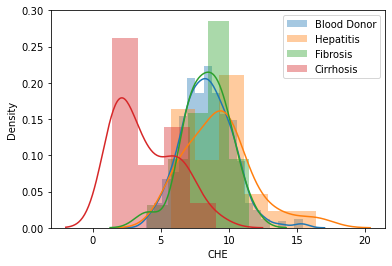

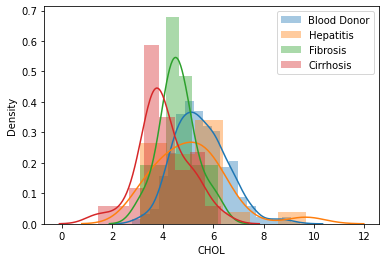

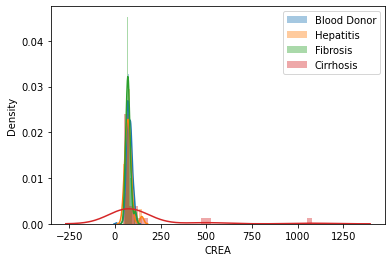

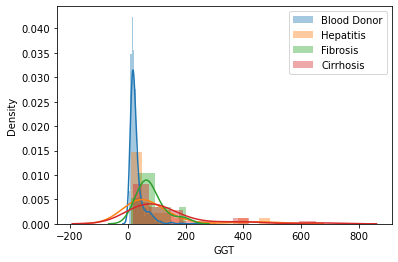

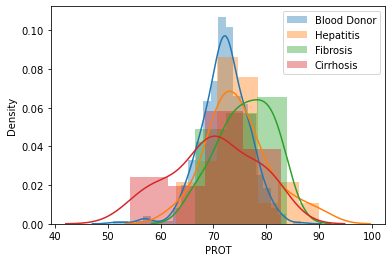

In [107]:
# distribution plot of Age
for column in X.columns:
    sns.distplot(data[column][data['Category'] == 0], kde=True, label='Blood Donor')
    sns.distplot(data[column][data['Category'] == 1], kde=True, label='Hepatitis')
    sns.distplot(data[column][data['Category'] == 2], kde=True, label='Fibrosis')
    sns.distplot(data[column][data['Category'] == 3], kde=True, label='Cirrhosis')
    plt.legend()
    plt.show()

In [ ]:
# Set the label to be only 2 group, patients and healthy people.
df = pd.read_csv('preprocesseddata.csv').drop(['Unnamed: 0'], axis=1)
df['Category'].replace([0,1,2,3],[0,1,1,1], inplace = True)
df.to_csv("preprocesseddata1.csv",sep=',')